# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

1- Load data

In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('loan_prediction.csv', index_col=False)
# shape of df
print(df.shape)

(614, 13)


In [3]:
assert df.shape == (614, 13)

In [4]:
# head of df
print(df.head)

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [5]:
# your code here
df.drop('Loan_ID', axis=1, inplace=True)


df['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)

print(df.shape)

(614, 12)


In [6]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [7]:
# your code here

NameError: name 'stats_df' is not defined

4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [9]:
print(df.isnull().sum())
df['Married'] = df['Married'].fillna(df['Married'].value_counts()[:1].index.tolist()[0])
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(480, 12)


In [10]:
assert df.isnull().sum().sum() == 0

AssertionError: 

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

<AxesSubplot:xlabel='Loan_Status', ylabel='percent'>

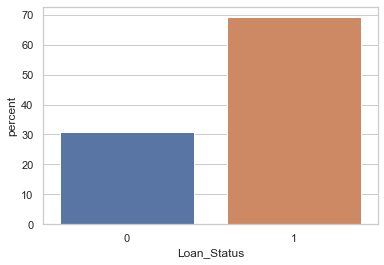

In [12]:
import seaborn as sns
column_values = df["Loan_Status"].values.ravel()
unique_values =  pd.unique(column_values)
null_values = 0
data = list()
for key in unique_values:
    temp_list = (key,null_values)
    data.append(temp_list)
d = pd.DataFrame(data, columns=['Loan_Status', 'percent'])
d['percent'] = (df['Loan_Status'].value_counts(normalize=False) / df['Loan_Status'].value_counts(normalize=False).sum()) * 100

sns.barplot(x="Loan_Status", y="percent", data=d)


5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [13]:
print("Approved : ", df['Loan_Status'].value_counts()[1])
print("Non Approved : ", df['Loan_Status'].value_counts()[0])

Approved :  332
Non Approved :  148


In [14]:
print("Accurary :",(df['Loan_Status'].value_counts(normalize=False) / df['Loan_Status'].value_counts(normalize=False).sum())[1] * 100)

Accurary : 69.16666666666667


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [15]:
def make_bar_plot(df, column):
    sns.barplot(x=column, y="Loan_Status", data=df)

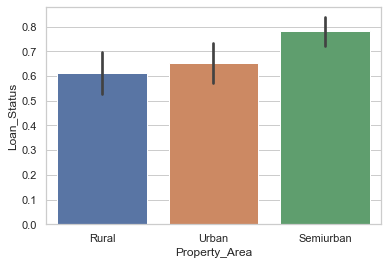

In [16]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [17]:
def make_box_plot(df, column):    
    sns.boxplot(x="Loan_Status", y=column, data=df)

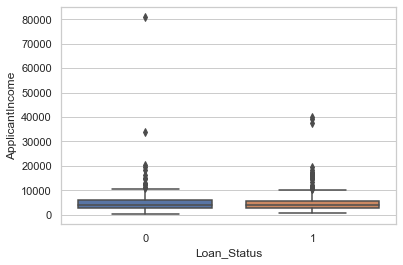

In [18]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************
****************** Married *******************
****************** Dependents *******************
****************** Education *******************
****************** Self_Employed *******************
****************** ApplicantIncome *******************
****************** CoapplicantIncome *******************
****************** LoanAmount *******************
****************** Loan_Amount_Term *******************
****************** Credit_History *******************
****************** Property_Area *******************
****************** Loan_Status *******************


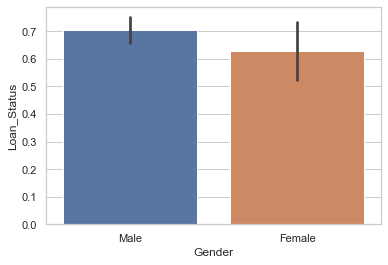

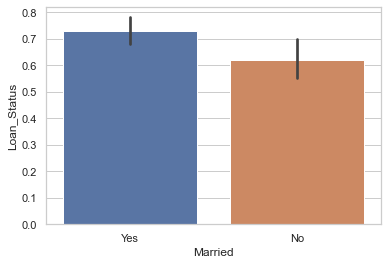

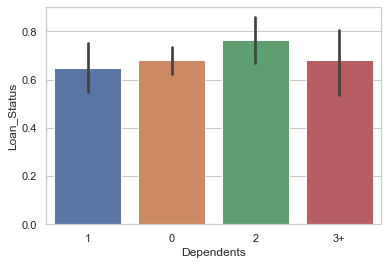

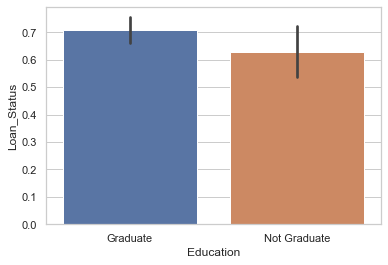

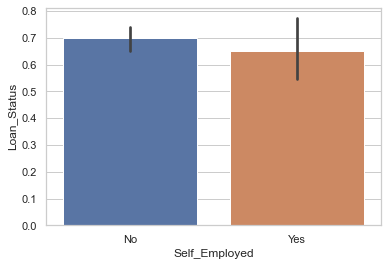

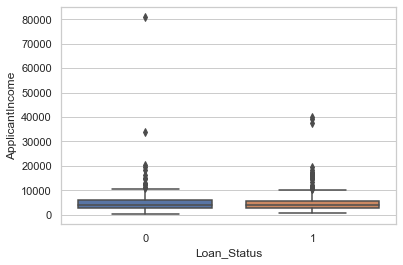

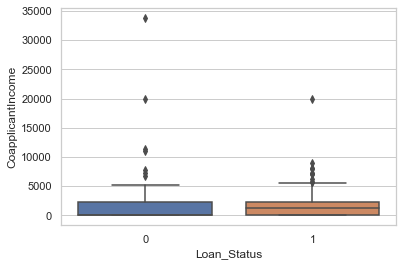

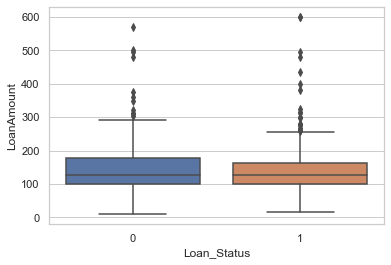

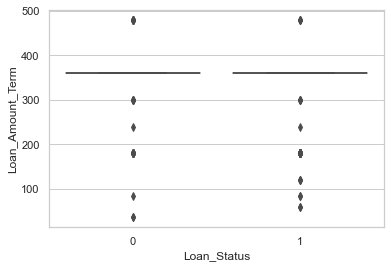

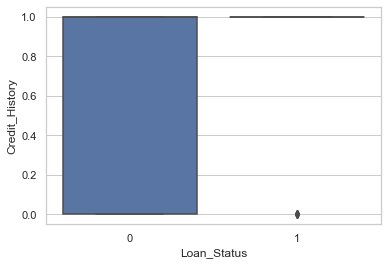

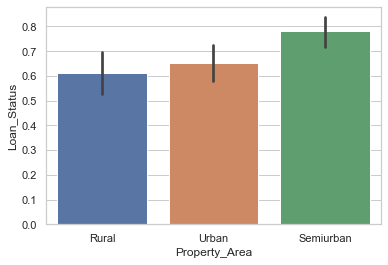

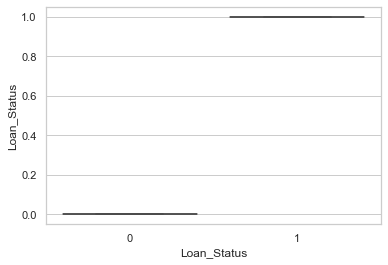

<Figure size 432x288 with 0 Axes>

In [22]:
for col in df:
    print(f'****************** {col} *******************')
    if col == "Target":
        continue
    if(df[col].dtype) == object:
        make_bar_plot(df,col)
        plt.figure()
    else:
        make_box_plot(df,col)
        plt.figure()

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [23]:
df = pd.get_dummies(df, columns=['Property_Area','Dependents'])

print the head of df

In [24]:
print(df.head)

<bound method NDFrame.head of      Gender Married     Education Self_Employed  ApplicantIncome  \
1      Male     Yes      Graduate            No             4583   
2      Male     Yes      Graduate           Yes             3000   
3      Male     Yes  Not Graduate            No             2583   
4      Male      No      Graduate            No             6000   
5      Male     Yes      Graduate           Yes             5417   
..      ...     ...           ...           ...              ...   
609  Female      No      Graduate            No             2900   
610    Male     Yes      Graduate            No             4106   
611    Male     Yes      Graduate            No             8072   
612    Male     Yes      Graduate            No             7583   
613  Female      No      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2        

In [ ]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [25]:
numerical = {"Gender":     {"Male": 0, "Female": 1},
                "Married": {"Yes": 1, "No": 0},
                 "Self_Employed": {"Yes": 1, "No": 0},
                 "Education": {"Graduate": 1, "Not Graduate": 0}}
df = df.replace(numerical)

Print the head of df

In [26]:
print(df.head)

<bound method NDFrame.head of      Gender  Married  Education  Self_Employed  ApplicantIncome  \
1         0        1          1              0             4583   
2         0        1          1              1             3000   
3         0        1          0              0             2583   
4         0        0          1              0             6000   
5         0        1          1              1             5417   
..      ...      ...        ...            ...              ...   
609       1        0          1              0             2900   
610       0        1          1              0             4106   
611       0        1          1              0             8072   
612       0        1          1              0             7583   
613       1        0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.

In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [27]:
y = df["Loan_Status"]
X = df.drop('Loan_Status', axis=1)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_train.shape, y_train.shape)

train shape (336, 16) (336,)
test shape (336, 16) (336,)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [31]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

print("Regressor intercept : ",regressor.intercept_)
print("Regressor coef :",regressor.coef_)

y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_pred)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Regressor intercept :  [0.24585272]
Regressor coef : [[-3.91535528e-01  8.34693582e-01  5.86255258e-01 -1.27303937e-01
  -1.02053345e-07 -3.09641507e-05 -4.04221323e-03 -4.55113723e-03
   2.21103666e+00 -4.92159590e-02  6.68647950e-01 -3.73580623e-01
   1.49926015e-02  5.07699781e-03  3.58002411e-01 -1.32220643e-01]]
     Actual  Predicted
540       1          1
360       0          1
6         1          1
386       1          1
511       1          1
..      ...        ...
466       0          0
255       1          0
193       1          1
446       1          1
495       1          1

[144 rows x 2 columns]
Accuracy: 0.8055555555555556
Precision: 0.7948717948717948
Recall: 0.9587628865979382


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

Text(0.5, 257.44, 'Predicted label')

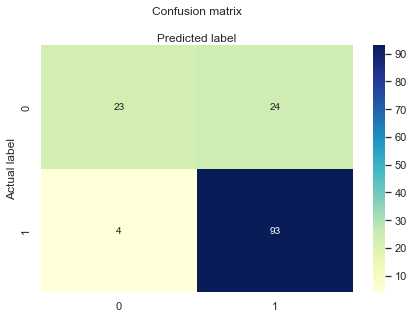

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
precision_0 = # your code here
recall_1 = # your code here
print ('precision_0 =', # your code here)
print ('recall_1 =',# your code here)

SyntaxError: invalid syntax (Temp/ipykernel_20092/2191285805.py, line 1)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(random_state=1), X, y, scoring="f1", cv = 7)
print(scores)
print ('scores mean =',scores.mean(), 'scores std =', scores.std())

[0.86792453 0.85185185 0.76       0.87619048 0.90384615 0.85714286
 0.90196078]
scores mean = 0.8598452359495645 scores std = 0.0448529505568339


how is the mean `f1_score` compared to the first one with train_test_split

In [36]:
scores.mean() - 0.79 # They are close

0.06984523594956449